# Basic Food Recommender Model

## Background

Indonesia memiliki cita-cita besar untuk menjadi negara maju. Oleh karena itu, peningkatan kualitas Sumber Daya Manusia (SDM) menjadi pilar penting yang harus diperbaiki, terutama dalam hal peningkatan kesehatan, pemenuhan gizi, dan pencegahan stunting (Kemenko PMK RI, 2024). Pemerintah Indonesia telah merencanakan untuk melaksanakan program makan bergizi gratis sesuai arahan Presiden RI Prabowo Subianto. Pemerintah berharap program tersebut dapat menurunkan jumlah kasus stunting bahkan mencegah kasus stunting baru di masa depan. Fokus awal dari program ini adalah anak-anak sekolah dan kelompok rentan lainnya. Anak sekolah yang dimaksud antara lain pelajar PAUD, SD, SMP, dan SMA (detik.com, 2024). 

Anak sekolah menjadi sasaran karena status gizi dan  stunting sangat mempengaruhi kecerdasan anak. Status gizi memberikan kontribusi terhadap kesulitan belajar sebesar 32,83%. Anak yang kekurangan nutrisi cenderung memiliki kelemahan pada sistem saraf hingga dapat menyebabkan kelainan motorik dan kognitif (Dewi, dkk, 2021). Sebagai calon penerus bangsa, maka pertumbuhan dan perkembangan anak sekolah perlu diperhatikan dengan baik agar menghasilkan potensi sumber daya manusia dengan kualitas maksimal. Hal ini dapat dicapai dengan salah satu cara yaitu pemenuhan kebutuhan nutrisi harian melalui program makanan bergizi gratis.

Angka Kecukupan Gizi (AKG) menurut Kementerian Kesehatan Republik Indonesia adalah kecukupan rata-rata gizi harian yang dianjurkan untuk sekelompok orang setiap harinya. Kebutuhan gizi ideal anak yang harus terpenuhi dalam sehari terbagi menjadi dua kelompok, yaitu zat gizi makro dan mikro. Zat gizi makro adalah semua jenis zat gizi yang dibutuhkan anak dalam jumlah banyak, seperti energi (kalori), protein, lemak, dan karbohidrat. Sementara zat gizi mikro adalah nutrisi yang dibutuhkan dalam jumlah sedikit, seperti vitamin dan mineral (Damar Upahita, 2021). Penentuan nilai gizi disesuaikan dengan jenis kelamin, kelompok umur, tinggi badan, berat badan, serta aktivitas fisik (Kemenkes RI, 2019).

Seluruh program makanan bergizi gratis harus melibatkan kolaborasi pemangku kepentingan terkait untuk dikonvergensikan sehingga bisa komprehensif dan terintegrasi. Salah satunya adalah penyediaan makanan yang efektif dan efisien. Salah satu perusahaan penyedia layanan catering dan bento, Olagizi ingin mengambil peran penting dalam penyediaan paket makanan bergizi bagi siswa SMP dan SMA. Olagizi ingin memberikan layanan dengan optimal. Oleh karena itu, Olagizi ingin membuat sebuah sistem yang dapat memberikan rekomendasi tentang makanan bergizi yang dipersonalisasi sesuai kebutuhan gizi dan selera para siswa. Di sisi lain, Olagizi juga ingin rekomendasi tersebut memberikan pilihan makanan yang dapat dimasak dalam waktu yang tidak terlalu lama agar makanan dapat disiapkan tepat pada waktu, khususnya makanan untuk sesi sarapan. Untuk pengembangan tahap awal, Olagizi ingin membuat model sistem rekomendasi makanan berdasarkan kemiripan bahan baku yang digunakan serta berdasarkan hasil ulasan rating makanan.

## Business Understanding

### Problem Statements

1. Bagaimana sistem rekomendasi dapat memberikan pilihan makanan dengan bahan baku utama yang sama?

2. Bagaimana sistem rekomendasi dapat memberikan berbagai pilihan makanan yang mungkin disukai oleh target pelanggan?

### Goals

1. Menghasilkan 10 rekomendasi makanan yang memiliki bahan baku utama yang sama serta dapat dimasak dalam waktu kurang dari 2 jam.

2. Menghasilkan 10 rekomendasi makanan yang mungkin disukai oleh target pelanggan dan dapat dimasak dalam waktu kurang dari 2 jam.

### Solution Statements

1. Menerapkan pendekatan _content-based filtering_ menggunakan algoritma _cosine similarity_ untuk menghitung kemiripan bahan baku yang digunakan diurutkan berdasarkan nilai _similarity_ terbesar.

2. Menerapkan pendekatan _collaborative filtering_ menggunakan algoritma _deep learning_ untuk menemukan pola pemberian rating oleh user.

## Data Understanding

#### Overview

Dataset ini berasal dari platform Kaggle salah satu pengembang sistem rekomendasi makanan dengan nama akun "GRACE HEPHZIBAH M" yang dapat diakses pada link di bawah. Pada proyek ini, akan menggunakan 2 file dataset dalam format csv, yaitu food data dan rating data.

_Download raw dataset_:
[Food Recommendation System](https://www.kaggle.com/code/gracehephzibahm/food-recommendation-system-easy-comprehensive/input)

##### food_df

| No | Kolom | Tipe Data | Deskripsi |
|----|-------|-----------|-----------|
| 1 | Name | `object` | Nama makanan. |
| 2 | Food_ID | `integer` | ID makanan. |
| 3 | C_Type | `object` | Kategori makanan. |
| 4 | Veg_Non | `object` | Keterangan apakah makanan mengandung bahan baku hewani atau tidak |
| 5 | Describe | `object` | Keterangan bahan-bahan yang digunakan pada makanan tersebut. |

##### rating_df

| No | Kolom | Tipe Data | Deskripsi |
|----|-------|-----------|-----------|
| 1 | User_ID | `integer` | ID pengguna yang memberikan ulasan. |
| 2 | Food_ID | `integer` | ID resep yang diberi ulasan. |
| 3 | Rating | `integer` | Penilaian yang diberikan (dalam skala 1 - 10). |

### Import Libraries

Import seluruh library yang diperlukan:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding, Flatten, Dot, Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, Callback, ModelCheckpoint

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score, confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity

### Load Data

Muat semua dataset yang akan digunakan:

In [3]:
# Data 1
food_data = "https://raw.githubusercontent.com/Sulbae/OlahGizi-Project/refs/heads/main/Food%20Recommender/raw-dataset/food.csv"
food_df = pd.read_csv(food_data)

# Data 2
rating_data = "https://raw.githubusercontent.com/Sulbae/OlahGizi-Project/refs/heads/main/Food%20Recommender/raw-dataset/ratings.csv"
rating_df = pd.read_csv(rating_data)

### Explore Data

#### Explore food_df

In [4]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food_ID   400 non-null    int64 
 1   Name      400 non-null    object
 2   C_Type    400 non-null    object
 3   Veg_Non   400 non-null    object
 4   Describe  400 non-null    object
dtypes: int64(1), object(4)
memory usage: 15.8+ KB


* Diketahui dataset memiliki 2 tipe data yaitu `int64` (untuk kolom Food_ID) dan `object` (untuk kolom lainnya) dengan total baris sebanyak 400.

In [6]:
# Check duplicates
print(f"Duplicated data:", food_df.duplicated().sum())

# recheck missing value
print(f"Missing value:", food_df.isna().sum().sum())

Duplicated data: 0
Missing value: 0


* Tidak terdapat duplikasi data maupun _missing value_.

Menampilkan 5 data teratas:

In [7]:
food_df.head()

,Food_ID,Name,C_Type,Veg_Non,Describe
0,1,summer squash salad,Healthy Food,veg,"white balsamic vinegar, lemon juice, lemon rin..."
1,2,chicken minced salad,Healthy Food,non-veg,"olive oil, chicken mince, garlic (minced), oni..."
2,3,sweet chilli almonds,Snack,veg,"almonds whole, egg white, curry leaves, salt, ..."
3,4,tricolour salad,Healthy Food,veg,"vinegar, honey/sugar, soy sauce, salt, garlic ..."
4,5,christmas cake,Dessert,veg,"christmas dry fruits (pre-soaked), orange zest..."


Visualisasi data *C_Type*:

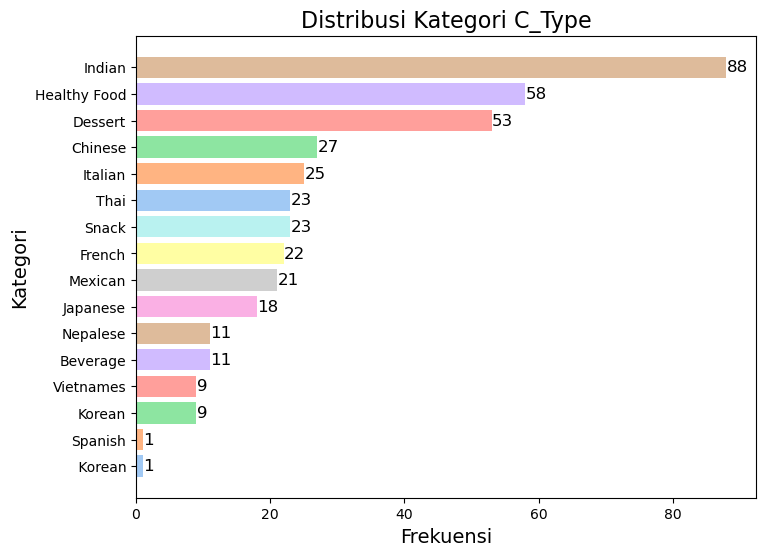

In [17]:
category_counts = food_df['C_Type'].value_counts().sort_values(ascending=True)

# Visualisasi dengan bar chart horizontal
plt.figure(figsize=(8, 6))
bars = plt.barh(category_counts.index, category_counts.values, color=sns.color_palette("pastel"))

for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width()}', va='center', ha='left', fontsize=12)

plt.title('Distribusi Kategori C_Type', fontsize=16)
plt.xlabel('Frekuensi', fontsize=14)
plt.ylabel('Kategori', fontsize=14)
plt.show()

* Makanan pada dataset didominasi oleh makanan dengan kateogori makanan India, Healthy Food, dan Dessert.

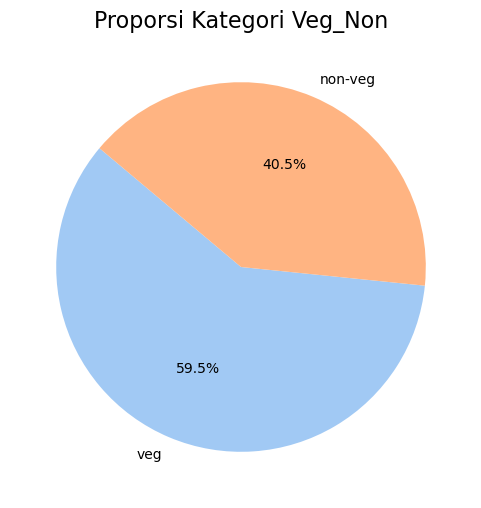

In [19]:
Veg_Non_counts = food_df['Veg_Non'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(Veg_Non_counts, labels=Veg_Non_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Proporsi Kategori Veg_Non', fontsize=16)
plt.show()

#### Explore rating_df

In [185]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11324 entries, 0 to 11323
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    11324 non-null  int64 
 1   recipe_id  11324 non-null  int64 
 2   date       11324 non-null  object
 3   rating     11324 non-null  int64 
 4   review     11323 non-null  object
dtypes: int64(3), object(2)
memory usage: 442.5+ KB


* Diketahui dataset memiliki 2 tipe data yaitu `object` dan `int64` dengan total baris sebanyak 11324 untuk hampir seluruh kolom kecuali kolom _review_ yang hanya memiliki 11323 baris data.
* Kolom _date_ seharusnya memiliki format data `datetime`.

In [186]:
# Check duplicates
print(f"Duplicated data:", rating_df.duplicated().sum())

# recheck missing value
print(f"Missing value:", rating_df.isna().sum())

Duplicated data: 0
Missing value: user_id      0
recipe_id    0
date         0
rating       0
review       1
dtype: int64


* Terdapat __1__ __missing value__ pada kolom _review_.

Menampilkan 5 data teratas:

In [ ]:
rating_df.head()

,user_id,recipe_id,date,rating,review
0,167527,380365,2009-09-14,5,I was born and raised in AL...this is a favori...
1,184723,34335,2008-01-15,5,"If I could give this more stars, I would. We ..."
2,2001108724,491150,2018-02-16,5,I made these last night and they were delish! ...
3,135804,50367,2004-04-01,4,Wonderful flavor. Roasting really brings out ...
4,1048246,388076,2010-01-04,5,I wanted to try something different for the ho...


Menampilkan statistik deskriptif:

In [ ]:
rating_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,11324.0,NaN,NaN,NaN,135714284.785588,497314543.229327,1533.0,137130.25,335614.0,804550.0,2002361699.0
recipe_id,11324.0,NaN,NaN,NaN,160390.387142,130555.805881,55.0,54960.0,118763.5,241566.75,536678.0
date,11324,4374,2008-01-02,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,11324.0,NaN,NaN,NaN,4.401095,1.277812,0.0,4.0,5.0,5.0,5.0
review,11323,11306,Excellent!,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Diketahui mayoritas user memberikan nilai 4-5.

Cek distribusi dan outlier data _rating_ menggunakan histogram dan boxplot:

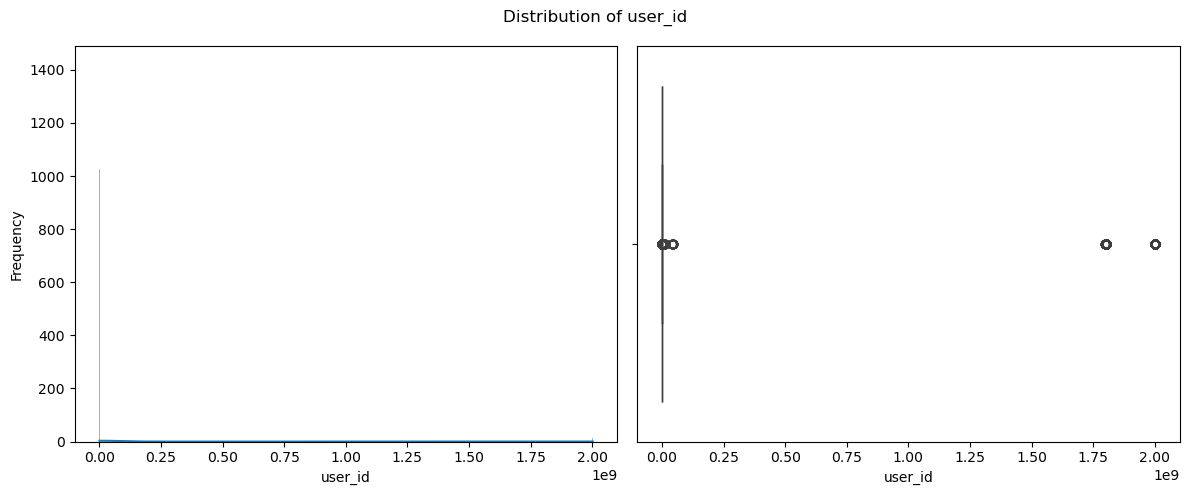

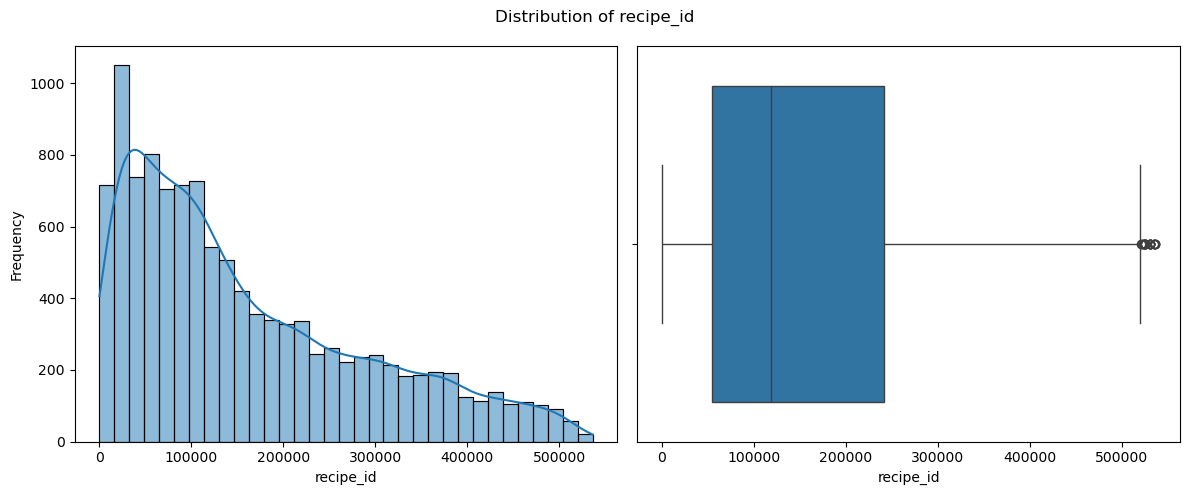

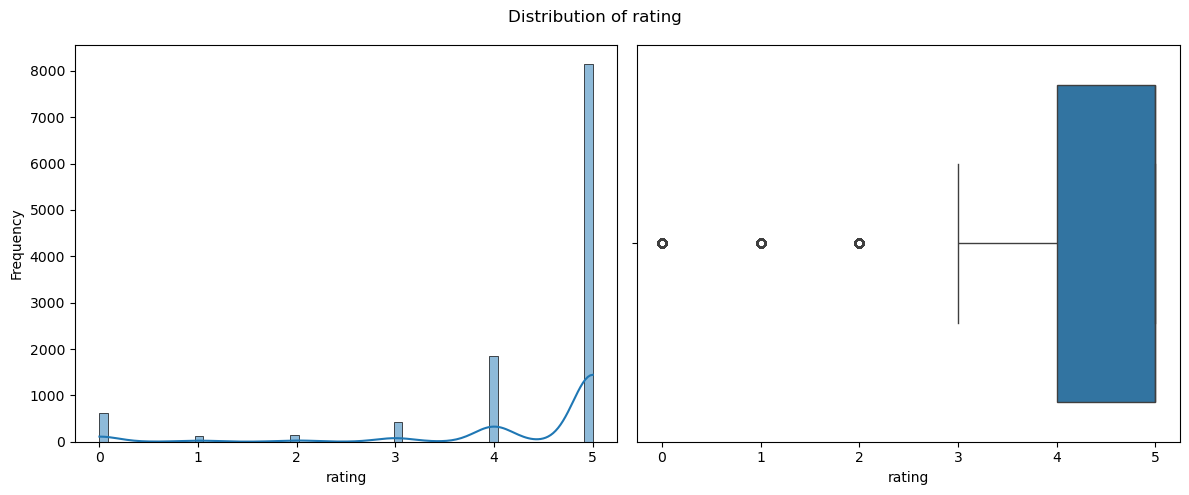

In [ ]:
for col in rating_df.select_dtypes(include="number").columns:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    fig.suptitle(f"Distribution of {col}")

    # Histogram
    sns.histplot(rating_df[col], kde=True, ax=axes[0])
    axes[0].set_ylabel("Frequency")
    # Box PLot
    sns.boxplot(x=rating_df[col], ax=axes[1])

    plt.tight_layout()
    plt.show()

## Data Preparation

### Data Cleaning

#### Convert _Date_ to `datetime`

Kolom _submitted_ pada food_df:

In [ ]:
food_df['submitted'] = pd.to_datetime(food_df['submitted'])
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2316 entries, 0 to 2315
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            2316 non-null   object        
 1   id              2316 non-null   int64         
 2   minutes         2316 non-null   int64         
 3   contributor_id  2316 non-null   int64         
 4   submitted       2316 non-null   datetime64[ns]
 5   tags            2316 non-null   object        
 6   nutrition       2316 non-null   object        
 7   n_steps         2316 non-null   int64         
 8   steps           2316 non-null   object        
 9   description     2264 non-null   object        
 10  ingredients     2316 non-null   object        
 11  n_ingredients   2316 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 217.2+ KB


Kolom _date_ pada rating_df:

In [ ]:
rating_df['date'] = pd.to_datetime(rating_df['date'])
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11324 entries, 0 to 11323
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   user_id    11324 non-null  int64         
 1   recipe_id  11324 non-null  int64         
 2   date       11324 non-null  datetime64[ns]
 3   rating     11324 non-null  int64         
 4   review     11323 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 442.5+ KB


#### Remove Missing Value

Menghapus baris data yang memiliki missing value pada  `recipes_samplpe_df`:

In [ ]:
food_df = food_df.dropna()

Recheck:

In [ ]:
# Recheck missing value
print(f"Missing value:", food_df.isna().sum().sum())

Missing value: 0


In [ ]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2264 entries, 0 to 2315
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            2264 non-null   object        
 1   id              2264 non-null   int64         
 2   minutes         2264 non-null   int64         
 3   contributor_id  2264 non-null   int64         
 4   submitted       2264 non-null   datetime64[ns]
 5   tags            2264 non-null   object        
 6   nutrition       2264 non-null   object        
 7   n_steps         2264 non-null   int64         
 8   steps           2264 non-null   object        
 9   description     2264 non-null   object        
 10  ingredients     2264 non-null   object        
 11  n_ingredients   2264 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 229.9+ KB


Menghapus baris data yang memiliki missing value pada  `interaction_samplpe_df`:

In [ ]:
rating_df = rating_df.dropna()

Recheck:

In [ ]:
# Recheck missing value
print(f"Missing value:", rating_df.isna().sum().sum())

Missing value: 0


In [ ]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11323 entries, 0 to 11323
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   user_id    11323 non-null  int64         
 1   recipe_id  11323 non-null  int64         
 2   date       11323 non-null  datetime64[ns]
 3   rating     11323 non-null  int64         
 4   review     11323 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 530.8+ KB


#### Outlier Handling

Remove outlier dari data _minutes_ pada food_df:

In [ ]:
food_df = food_df[food_df['minutes'] <= 1440]
food_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2239 entries, 0 to 2315
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            2239 non-null   object        
 1   id              2239 non-null   int64         
 2   minutes         2239 non-null   int64         
 3   contributor_id  2239 non-null   int64         
 4   submitted       2239 non-null   datetime64[ns]
 5   tags            2239 non-null   object        
 6   nutrition       2239 non-null   object        
 7   n_steps         2239 non-null   int64         
 8   steps           2239 non-null   object        
 9   description     2239 non-null   object        
 10  ingredients     2239 non-null   object        
 11  n_ingredients   2239 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 227.4+ KB


* Menghapus data resep makanan yang membutuhkan waktu lebih dari 24 jam atau 1440 menit untuk memasaknya.

### Filter Data

#### food_df

Berdasarkan _goals_ yang telah ditetapkan, Olagizi ingin sistem memberikan rekomendasi makanan yang dapat dimasak kurang dari 2 jam. Oleh karena itu, data sebaiknya disaring terlebih dahulu.

In [ ]:
food_df = food_df[food_df['minutes'] < 120]
food_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2009 entries, 2 to 2315
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            2009 non-null   object        
 1   id              2009 non-null   int64         
 2   minutes         2009 non-null   int64         
 3   contributor_id  2009 non-null   int64         
 4   submitted       2009 non-null   datetime64[ns]
 5   tags            2009 non-null   object        
 6   nutrition       2009 non-null   object        
 7   n_steps         2009 non-null   int64         
 8   steps           2009 non-null   object        
 9   description     2009 non-null   object        
 10  ingredients     2009 non-null   object        
 11  n_ingredients   2009 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 204.0+ KB


### Features Enginering

#### Ekstrak data pada fitur _nutrition_ dalam `food_df`:

1. Check data

In [ ]:
food_df['nutrition'].info()
food_df['nutrition'].head()

<class 'pandas.core.series.Series'>
Index: 2009 entries, 2 to 2315
Series name: nutrition
Non-Null Count  Dtype 
--------------  ----- 
2009 non-null   object
dtypes: object(1)
memory usage: 31.4+ KB


2         [42.3, 0.0, 13.0, 2.0, 6.0, 0.0, 2.0]
3     [241.8, 2.0, 57.0, 63.0, 21.0, 3.0, 16.0]
4       [207.2, 3.0, 7.0, 44.0, 52.0, 3.0, 6.0]
5     [170.9, 16.0, 11.0, 12.0, 20.0, 9.0, 3.0]
6    [220.7, 8.0, 20.0, 12.0, 17.0, 17.0, 11.0]
Name: nutrition, dtype: object

Diketahui data pada kolom _nutrition_ memiliki format `object` yang berisi sebuah `list`. Data tersebut mengandung informasi jumlah kalori, lemak, gula, sodium, protein, lemak jenuh, dan karbohidrat.

2. Mengubah tipe data menjadi list:

In [ ]:
food_df['nutrition'] = food_df['nutrition'].apply(lambda x: eval(x))

food_df['nutrition'].info()

<class 'pandas.core.series.Series'>
Index: 2009 entries, 2 to 2315
Series name: nutrition
Non-Null Count  Dtype 
--------------  ----- 
2009 non-null   object
dtypes: object(1)
memory usage: 31.4+ KB


recheck tipe data:

In [ ]:
food_df['nutrition'].apply(type)

2       <class 'list'>
3       <class 'list'>
4       <class 'list'>
5       <class 'list'>
6       <class 'list'>
             ...      
2311    <class 'list'>
2312    <class 'list'>
2313    <class 'list'>
2314    <class 'list'>
2315    <class 'list'>
Name: nutrition, Length: 2009, dtype: object

3. Memisahkan data _nutrition_ menjadi kolom tersendiri:

In [ ]:
nutrition_columns = ["calories", "fat", "sugar", "sodium", "protein", "saturated fat", "carbohydrates"]

food_df[nutrition_columns] = pd.DataFrame(food_df['nutrition'].tolist(), index=food_df.index, dtype="float64")
food_df.drop(columns=['nutrition'], inplace=True)

food_df.head()

,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,calories,fat,sugar,sodium,protein,saturated fat,carbohydrates
2,simple spinach salad with lemon mint dressing,161266,10,11297,2006-03-23,"['15-minutes-or-less', 'time-to-make', 'course...",9,"['place spinach leaves on a platter', 'mix thr...",the title says it all :) makes a nice healt...,"['baby spinach leaves', 'alfalfa sprout', 'che...",9,42.3,0.0,13.0,2.0,6.0,0.0,2.0
3,fat free sugar free soft serve,233665,2,512320,2007-06-09,"['15-minutes-or-less', 'time-to-make', 'course...",1,['mix all the ingredients together with a whis...,for use in a soft serve maker,['fat-free sugar-free instant chocolate puddin...,4,241.8,2.0,57.0,63.0,21.0,3.0,16.0
4,u nega gei,306936,50,527886,2008-06-03,"['60-minutes-or-less', 'time-to-make', 'course...",8,"['place broth in a large saucepan', 'add green...",the iroquois confederacy included parts of wha...,"['chicken broth', 'green onion', 'cornmeal', '...",10,207.2,3.0,7.0,44.0,52.0,3.0,6.0
5,bosnian vegetarian meatballs in yogurt sauce,134497,75,206722,2005-08-22,"['time-to-make', 'course', 'main-ingredient', ...",11,['saute the onions and garlic in oil until the...,an untried moosewood recipe posted for the zaa...,"['onions', 'garlic cloves', 'vegetable oil', '...",19,170.9,16.0,11.0,12.0,20.0,9.0,3.0
6,potato goat cheese gratin,334056,90,705876,2008-10-29,"['time-to-make', 'course', 'main-ingredient', ...",18,['preheat oven to 400f in nonstick skillet coo...,"usually not a big fan of goat cheese, but this...","['leeks', 'nonfat milk', 'all-purpose flour', ...",12,220.7,8.0,20.0,12.0,17.0,17.0,11.0


In [ ]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2009 entries, 2 to 2315
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            2009 non-null   object        
 1   id              2009 non-null   int64         
 2   minutes         2009 non-null   int64         
 3   contributor_id  2009 non-null   int64         
 4   submitted       2009 non-null   datetime64[ns]
 5   tags            2009 non-null   object        
 6   n_steps         2009 non-null   int64         
 7   steps           2009 non-null   object        
 8   description     2009 non-null   object        
 9   ingredients     2009 non-null   object        
 10  n_ingredients   2009 non-null   int64         
 11  calories        2009 non-null   float64       
 12  fat             2009 non-null   float64       
 13  sugar           2009 non-null   float64       
 14  sodium          2009 non-null   float64       
 15  protein  

#### Ambil bahan baku utama pada kolom _ingredients_ dalam `food_df`:

Konversi data string menjadi list:

In [ ]:
food_df['ingredients'] = food_df['ingredients'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [ ]:
food_df['ingredients']

2       [baby spinach leaves, alfalfa sprout, cherry t...
3       [fat-free sugar-free instant chocolate pudding...
4       [chicken broth, green onion, cornmeal, haddock...
5       [onions, garlic cloves, vegetable oil, carrots...
6       [leeks, nonfat milk, all-purpose flour, salt, ...
                              ...                        
2311    [white sugar, light karo syrup, water, cinnamo...
2312    [butter, eggs, milk, sugar, baking powder, sal...
2313    [fish steaks, tomatoes, malt vinegar, soft bre...
2314    [eggs, sugar, vegetable oil, cinnamon, baking ...
2315    [dry breadcrumbs, fresh cilantro, parmesan che...
Name: ingredients, Length: 2009, dtype: object

Mengambil elemen ke-1 - 3 dan ubah menjadi string:

In [ ]:
food_df['ingredients'] = food_df['ingredients'].apply(
    lambda x: str(x[0]) if isinstance(x, list) and len(x) > 0 else None
)

In [ ]:
food_df['ingredients']

2       None
3       None
4       None
5       None
6       None
        ... 
2311    None
2312    None
2313    None
2314    None
2315    None
Name: ingredients, Length: 2009, dtype: object

### Content-Based Filtering

#### Features Selection

Untuk sistem rekomendasi content-based filtering, data yang digunakan cukup data *recipe_id, name, minutes,* dan *n_steps* dari `recipes_sampel_df`.

In [ ]:
content_based_columns = ["id", 
                         "name",
                         "ingredients",
                         "calories",
                         "minutes",
                         "steps"]

content_based_df = food_df[content_based_columns]
content_based_df

,id,name,ingredients,calories,minutes,steps
2,161266,simple spinach salad with lemon mint dressing,None,42.3,10,"['place spinach leaves on a platter', 'mix thr..."
3,233665,fat free sugar free soft serve,None,241.8,2,['mix all the ingredients together with a whis...
4,306936,u nega gei,None,207.2,50,"['place broth in a large saucepan', 'add green..."
5,134497,bosnian vegetarian meatballs in yogurt sauce,None,170.9,75,['saute the onions and garlic in oil until the...
6,334056,potato goat cheese gratin,None,220.7,90,['preheat oven to 400f in nonstick skillet coo...
...,...,...,...,...,...,...
2311,199856,cinnamon hard candy,None,5217.1,25,"['boil sugar , syrup , and water to a hard cra..."
2312,529697,best ever cornbread,None,618.8,85,"['dry bowl: whisk 2 cups cornmeal , 3 cups all..."
2313,10778,savoury fish steaks,None,110.7,25,"['place in a baking pan', 'wash and pat fish s..."
2314,128239,dolly madison muffins,None,166.8,30,['mix all ingredients together in very large b...


In [211]:
content_based_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2009 entries, 2 to 2315
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           2009 non-null   int64  
 1   name         2009 non-null   object 
 2   ingredients  2009 non-null   object 
 3   calories     2009 non-null   float64
 4   minutes      2009 non-null   int64  
 5   steps        2009 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 109.9+ KB


#### Feature Extraction

In [214]:
content_based_df['ingredients']

2       [baby spinach leaves, alfalfa sprout, cherry t...
3       [fat-free sugar-free instant chocolate pudding...
4       [chicken broth, green onion, cornmeal, haddock...
5       [onions, garlic cloves, vegetable oil, carrots...
6       [leeks, nonfat milk, all-purpose flour, salt, ...
                              ...                        
2311    [white sugar, light karo syrup, water, cinnamo...
2312    [butter, eggs, milk, sugar, baking powder, sal...
2313    [fish steaks, tomatoes, malt vinegar, soft bre...
2314    [eggs, sugar, vegetable oil, cinnamon, baking ...
2315    [dry breadcrumbs, fresh cilantro, parmesan che...
Name: ingredients, Length: 2009, dtype: object

Mengubah data teks menjadi vektor numerik:

In [215]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 4), token_pattern=r'\b[a-zA-Z]+\b')

tfidf_vectorizer.fit(content_based_df['ingredients'])

teks = tfidf_vectorizer.get_feature_names_out()

AttributeError: 'list' object has no attribute 'lower'

In [84]:
teks

array(['active', 'active dry', 'active dry yeast', ..., 'zinfandel',
       'zinfandel wine', 'zucchini'], dtype=object)

In [85]:
tfidf_matrix = tfidf_vectorizer.fit_transform(content_based_df['ingredients'])

tfidf_matrix.shape

(2009, 2045)

In [86]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [87]:
pd.DataFrame(tfidf_matrix.todense(),
             columns=teks,
             index=content_based_df.ingredients
             ).sample(20, axis=1).sample(5, axis=0)

,raspberry juice,molasses,oat cereal,chops,chocolate baking,lamb chops,heads,x rated,halves,brown rice syrup,tofu,unbleached purpose flour,yellow cake mix,grapes,instant,baby carrots,tri,white chocolate candy melts,flake,sugar free instant chocolate
ingredients,,,,,,,,,,,,,,,,,,,,
apple juice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
salmon steaks,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brown rice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
all-purpose flour,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
plain flour,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Collaborative Filtering

#### Features Selection

In [ ]:
collaborative_based_columns = ["recipe_id", 
                               "user_id",
                               "rating"]

collaborative_df = rating_df[collaborative_based_columns]
collaborative_df['food_name'] = food_df['name']

collaborative_df.head()

C:\Users\ACER\AppData\Local\Temp\ipykernel_7420\1035763189.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collaborative_df['food_name'] = recipes_sample_df['name']


,recipe_id,user_id,rating,food_name
0,380365,167527,5,NaN
1,34335,184723,5,NaN
2,491150,2001108724,5,simple spinach salad with lemon mint dressing
3,50367,135804,4,fat free sugar free soft serve
4,388076,1048246,5,u nega gei


Check data:

In [659]:
collaborative_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11323 entries, 0 to 11323
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   recipe_id  11323 non-null  int64 
 1   user_id    11323 non-null  int64 
 2   rating     11323 non-null  int64 
 3   food_name  2009 non-null   object
dtypes: int64(3), object(1)
memory usage: 442.3+ KB


Check missing value:

In [660]:
print("Missing Value:", collaborative_df.isna().sum())

Missing Value: recipe_id       0
user_id         0
rating          0
food_name    9314
dtype: int64


Remove the data have missing value:

In [661]:
collaborative_df = collaborative_df.dropna()

collaborative_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2009 entries, 2 to 2315
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   recipe_id  2009 non-null   int64 
 1   user_id    2009 non-null   int64 
 2   rating     2009 non-null   int64 
 3   food_name  2009 non-null   object
dtypes: int64(3), object(1)
memory usage: 78.5+ KB


#### Features Encoding

Melakukan encoding terhadap data recipe_id:

In [662]:
# Mengubah recipe_id menjadi list tanpa nilai yang sama
recipe_ids = collaborative_df["recipe_id"].unique().tolist()
print("list recipe_id: ", recipe_ids)

# Melakukan encoding terhadap recipe_id
recipe_to_recipe_encoded = {x: i for i, x in enumerate(recipe_ids)}
print("encoded recipe_id: ", recipe_to_recipe_encoded)

# Melakukan proses encoding angka ke recipe_id
recipe_encoded_to_recipe = {i: x for i, x in enumerate(recipe_ids)}
print("encoded angka ke recipe_id: ", recipe_encoded_to_recipe)

list recipe_id:  [491150, 50367, 388076, 82666, 477779, 293316, 329224, 217803, 123111, 112478, 62936, 473421, 34853, 286015, 27208, 126611, 43812, 76495, 374133, 494105, 386397, 320452, 31811, 39087, 257701, 113014, 38824, 49153, 236725, 57062, 211523, 94055, 140051, 115153, 93573, 117370, 53907, 3470, 17092, 118285, 392711, 3653, 173701, 123854, 137370, 56891, 132757, 32277, 118373, 15025, 25568, 51834, 371960, 117317, 403520, 240260, 154740, 162961, 256670, 1236, 248350, 61044, 15072, 198995, 87072, 449590, 256175, 188291, 321624, 29413, 85516, 51830, 87028, 108964, 137495, 107997, 221275, 335132, 377585, 261072, 31286, 330420, 411617, 63446, 8701, 49534, 458842, 289343, 116266, 28165, 110604, 32880, 22539, 401282, 168258, 92660, 367044, 450096, 46501, 445697, 202200, 241042, 301865, 71227, 60820, 401483, 77666, 461075, 105260, 61827, 105051, 211496, 208369, 403492, 323117, 323677, 161430, 319384, 371606, 142729, 24217, 59668, 61333, 71373, 425704, 268411, 287276, 86983, 151090, 223

Melakukan encoding terhadap data user_id:

In [663]:
# Mengubah user_id menjadi list tanpa nilai yang sama
user_ids = collaborative_df["user_id"].unique().tolist()
print("list user_id: ", user_ids)

# Melakukan encoding terhadap user_id
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print("encoded user_id: ", user_to_user_encoded)

# Melakukan proses encoding angka ke user_id
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print("encoded angka ke user_id: ", user_encoded_to_user)

list user_id:  [2001108724, 135804, 1048246, 128950, 869153, 134124, 593927, 2000991193, 307995, 129652, 230617, 2179545, 9869, 37636, 194888, 201064, 145547, 176615, 632657, 383346, 113509, 107583, 179133, 327600, 1801014030, 229800, 55827, 55862, 797486, 233829, 47559, 90987, 83503, 1839316, 89831, 1565704, 168922, 605947, 41481, 2100351, 936601, 412186, 1336981, 1160862, 51011, 531768, 528197, 35701, 226863, 33135, 37471, 50509, 865936, 1830040, 28397, 550518, 2656825, 559290, 345380, 1449637, 1802863776, 2798981, 30911, 8629, 6357, 2308358, 226066, 37449, 379033, 486078, 567219, 14823, 101376, 98063, 229009, 670089, 1814518, 1224782, 469021, 537937, 1571237, 197023, 220166, 604073, 616177, 1179225, 361238, 752595, 2000695358, 487548, 31083, 358095, 288587, 2001681622, 270212, 895132, 383795, 573325, 128473, 143387, 653438, 322381, 851841, 460048, 96359, 486725, 513933, 135017, 270514, 813515, 354763, 61660, 293102, 1365025, 993476, 510313, 2021204, 211184, 439797, 142200, 110210, 1

Memetakan recipe_id dan user_id yang telah diproses ke dataframe yang berkaitan:

In [664]:
# Mapping recipe_id ke dataframe recipe
collaborative_df['recipe'] = collaborative_df['recipe_id'].map(recipe_to_recipe_encoded)

# Mapping user_id ke dataframe user
collaborative_df['user'] = collaborative_df['user_id'].map(user_to_user_encoded)

Check data:

In [665]:
collaborative_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2009 entries, 2 to 2315
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   recipe_id  2009 non-null   int64 
 1   user_id    2009 non-null   int64 
 2   rating     2009 non-null   int64 
 3   food_name  2009 non-null   object
 4   recipe     2009 non-null   int64 
 5   user       2009 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 109.9+ KB


In [666]:
collaborative_df.head()

,recipe_id,user_id,rating,food_name,recipe,user
2,491150,2001108724,5,simple spinach salad with lemon mint dressing,0,0
3,50367,135804,4,fat free sugar free soft serve,1,1
4,388076,1048246,5,u nega gei,2,2
5,82666,128950,5,bosnian vegetarian meatballs in yogurt sauce,3,3
6,477779,869153,0,potato goat cheese gratin,4,4


#### Data Normalization

Normalisasi data target untuk pelatihan:

In [667]:
rating_scaler = MinMaxScaler()

collaborative_df['rating'] = rating_scaler.fit_transform(collaborative_df['rating'].values.reshape(-1, 1))

In [668]:
collaborative_df['rating']

2       1.0
3       0.8
4       1.0
5       1.0
6       0.0
       ... 
2311    1.0
2312    1.0
2313    1.0
2314    1.0
2315    1.0
Name: rating, Length: 2009, dtype: float64

In [669]:
collaborative_df['rating'].describe()

count    2009.000000
mean        0.879044
std         0.256555
min         0.000000
25%         0.800000
50%         1.000000
75%         1.000000
max         1.000000
Name: rating, dtype: float64

#### Data Split

Data diacak terlebih dahulu agar distribusinya random:

In [670]:
collaborative_df = collaborative_df.sample(frac=1, random_state=42)

Menentukan fitur dan target:

In [671]:
x = collaborative_df[['user', 'recipe']].values
y = collaborative_df['rating'].values

Pembagian data ke dalam training set dan validation set:

In [672]:
train_indices = int(0.8 * collaborative_df.shape[0])

x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 707 1526]
 [ 489  514]
 [ 200  385]
 ...
 [ 760  832]
 [  23 1395]
 [ 120 1086]] [1.  0.8 1.  ... 1.  1.  1. ]


## Modeling

### Cosine Similarity

In [88]:
cos_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [94]:
cos_sim_df = pd.DataFrame(cos_sim, 
                          index=content_based_df['name'],
                          columns=content_based_df['name'])

print("Shape:", cos_sim_df.shape)

cos_sim_df.sample(10, axis=1).sample(10, axis=0)

Shape: (2009, 2009)


name,new vanishing oatmeal raisin cookies,lunch ladies creamy italian spinach,coffee mousse pie,easy peasy chicken salad,korean lamb chops,piedmont roasted bell peppers,black coffee cake,apple and banana nut muffins,cream cheese hot dogs,u nega gei
name,,,,,,,,,,
chazz s smoke bread smoke bread,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
andouille burgers with red pepper mayo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fabulous icing,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
lori s risotto,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
condiglione italian tuna salad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
easy vegetarian lasagne some assembly required,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
scott peacock s chocolate meringue pie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gaspacho alentejana gazpacho alentejo s way,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
new potatoes with fresh horseradish sauce vegan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Neural Collaborative Filtering

Menghitung jumlah nilai unik masing-masing fitur:

In [675]:
n_users = collaborative_df['user'].nunique()
print(n_users)

n_recipes = collaborative_df['recipe'].nunique()
print(n_recipes)

1602
1915


Membuat model rekomendasi dengan embedding layer:

In [692]:
class NFCRecommender(tf.keras.Model):
    
     # Insialisasi fungsi
    def __init__(self, n_users, n_recipes, embedding_size, **kwargs):
        super(NFCRecommender, self).__init__(**kwargs)
        self.n_users = n_users
        self.n_recipes = n_recipes
        self.embedding_size = embedding_size

        # Membentuk layer embedding user
        self.users_embedding = layers.Embedding(
            n_users,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        self.users_bias = layers.Embedding(n_users, 1)

        # Membentuk layer embedding recipe
        self.recipes_embedding = layers.Embedding(
            n_recipes,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        self.recipes_bias = layers.Embedding(n_recipes, 1)

    def call(self, inputs):
        users_vector = self.users_embedding(inputs[:,0]) # memanggil layer embedding 1
        users_bias = self.users_bias(inputs[:, 0]) # memanggil layer embedding 2
        recipes_vector = self.recipes_embedding(inputs[:, 1]) # memanggil layer embedding 3
        recipes_bias = self.recipes_bias(inputs[:, 1]) # memanggil layer embedding 4

        dot_users_recipes = tf.reduce_sum(users_vector * recipes_vector, axis=1, keepdims=True)

        x = dot_users_recipes + users_bias + recipes_bias

        # Menggunakan fungsi aktivasi sigmoid
        return tf.nn.sigmoid(x)

Compile model:

In [693]:
model = NFCRecommender(n_users, n_recipes, 4)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001),
    metrics = [tf.keras.metrics.RootMeanSquaredError()]
)

In [694]:
history = model.fit(
    x = x_train,
    y = y_train,
    validation_data=(x_val, y_val),
    batch_size=128,
    epochs=100
)

Epoch 1/100
13/13 [==============================] - 1s 32ms/step - loss: 0.6932 - root_mean_squared_error: 0.4560 - val_loss: 0.6928 - val_root_mean_squared_error: 0.4643
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 0.6898 - root_mean_squared_error: 0.4541 - val_loss: 0.6922 - val_root_mean_squared_error: 0.4640
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6867 - root_mean_squared_error: 0.4524 - val_loss: 0.6916 - val_root_mean_squared_error: 0.4637
Epoch 4/100
13/13 [==============================] - 0s 8ms/step - loss: 0.6838 - root_mean_squared_error: 0.4508 - val_loss: 0.6909 - val_root_mean_squared_error: 0.4633
Epoch 5/100
13/13 [==============================] - 0s 35ms/step - loss: 0.6809 - root_mean_squared_error: 0.4492 - val_loss: 0.6903 - val_root_mean_squared_error: 0.4630
Epoch 6/100
13/13 [==============================] - 0s 31ms/step - loss: 0.6780 - root_mean_squared_error: 0.4476 - val_loss: 0.6897 - val_roo

Visualisasi hasil pelatihan model:

C:\Users\ACER\AppData\Local\Temp\ipykernel_7420\2240796526.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  train_result.show()


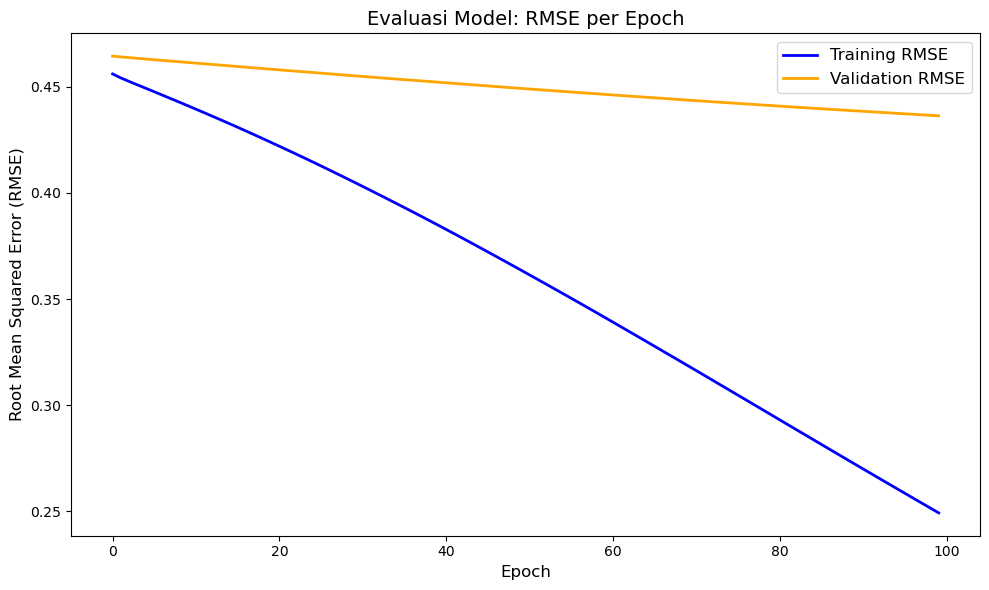

In [732]:
train_result, ax = plt.subplots(figsize=(10, 6))

ax.plot(history.history["root_mean_squared_error"], label="Training RMSE", color='blue', linewidth=2)
ax.plot(history.history["val_root_mean_squared_error"], label="Validation RMSE", color='orange', linewidth=2)

ax.set_title("Evaluasi Model: RMSE per Epoch", fontsize=14)
ax.set_ylabel("Root Mean Squared Error (RMSE)", fontsize=12)
ax.set_xlabel("Epoch", fontsize=12)

ax.legend(loc="upper right", fontsize=12)

train_result.tight_layout()

train_result.show()

## Get Recommendations

### Content Based Filtering

In [95]:
def rekomendasi_makanan(nama_makanan, similarity_data=cos_sim_df, items=content_based_df, k = 10):

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy Range(start, stop, step)
    index = similarity_data.loc[:, nama_makanan].to_numpy().argpartition(range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1 : -(k + 2) : -1].flatten()]

    # Drop nama makanan target
    closest = closest.drop(nama_makanan, errors = "ignore")

    # Gabungkan dengan DataFrame asli untuk mengambil detail makanan
    recommendations = pd.DataFrame(closest, columns=["name"]).merge(items, on="name")

    # Ambil data makanan target
    target_item = items[items['name'] == nama_makanan].iloc[0]
    
    # Tambahkan kolom perbedaan kriteria
    recommendations['calories_gap'] = recommendations['calories'] - target_item['calories']

    return recommendations.head(k)

In [96]:
content_based_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2009 entries, 2 to 2315
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           2009 non-null   int64  
 1   name         2009 non-null   object 
 2   ingredients  2009 non-null   object 
 3   calories     2009 non-null   float64
 4   minutes      2009 non-null   int64  
 5   steps        2009 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 109.9+ KB


In [101]:
# Menampilkan makanan yang pernah dipilih
makanan_pertama_df = content_based_df[content_based_df['name'] == "meatloaf with potato topping"]
makanan_pertama_df

,id,name,ingredients,calories,minutes,steps
2291,178424,meatloaf with potato topping,vegetable oil,414.6,105,"['in nonstick skillet , heat oil over medium h..."


In [102]:
# Menampilkan rekomendasi makanan berdasarkan makanan yang pernah dipilih
rekomendasi_makanan_df = pd.DataFrame(rekomendasi_makanan("meatloaf with potato topping"))

In [103]:
rekomendasi_makanan_df

,name,id,ingredients,calories,minutes,steps,calories_gap
0,crustless spainch and mushroom quiche,527347,vegetable oil,125.2,55,"['preheat oven to 350-degrees f', 'spray 9-inc...",-289.4
1,gumbo,32042,vegetable oil,551.6,60,['in a large stockpot combine oil and flour an...,137.0
2,argentinian grilled flank steak with chimichur...,457101,vegetable oil,672.1,20,"[""prepare grill according to manufacturer's in...",257.5
3,weight watchers chili lime chicken 3 points,408980,vegetable oil,300.9,15,"['in a large nonstick skillet , heat the oil',...",-113.7
4,capo s chicken diablo,139260,vegetable oil,481.3,60,"['preheat oven to 350 degrees f', 'in a small ...",66.7
5,cambodian sweet and sour fish,505454,vegetable oil,94.7,25,"['in a measuring cup , mix together the fish s...",-319.9
6,french onion jambalaya,29073,vegetable oil,526.5,30,"['heat oil in skillet', 'add the chicken , sau...",111.9
7,creamy chicken black bean enchiladas,518749,vegetable oil,430.0,50,['add vegetable oil to skillet & heat on mediu...,15.4
8,shrimp supreme,126333,vegetable oil,285.5,20,"['heat oil in a large skillet on medium heat',...",-129.1
9,melt in your mouth barbecued chicken,190558,vegetable oil,541.7,70,['heat oil in a large skillet over medium-high...,127.1


### Collaborative Filtering

In [707]:
food_df = collaborative_df
df = collaborative_df
 
# Mengambil sample user
user_id = df.user_id.sample(1).iloc[0]
selected_food_by_user = df[df.user_id == user_id]

food_not_selected = food_df[~food_df['recipe_id'].isin(selected_food_by_user.recipe_id.values)]['recipe_id'] 
food_not_selected = list(
    set(food_not_selected)
    .intersection(set(recipe_to_recipe_encoded.keys()))
)
 
food_not_selected = [[recipe_to_recipe_encoded.get(x)] for x in food_not_selected]
user_encoder = user_to_user_encoded.get(user_id)
user_resto_array = np.hstack(
    ([[user_encoder]] * len(food_not_selected), food_not_selected)
)

In [723]:
ratings = model.predict(user_resto_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_food_ids = list(set([
    recipe_encoded_to_recipe.get(food_not_selected[x][0])
    for x in top_ratings_indices
]))
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Food with high ratings from user')
print('----' * 8)

top_food_user = (
    selected_food_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .recipe_id.values
)
 
food_df_rows = food_df[food_df['recipe_id'].isin(top_food_user)]
for row in food_df_rows.itertuples():
    print(row.food_name)
 
print('----' * 8)
print('Top 10 food recommendation')
print('----' * 8)
 
recommended_food = food_df[food_df['recipe_id'].isin(recommended_food_ids)].head(10)
for row in recommended_food.itertuples():
    print('Recipe ID:', row.recipe_id, '-' , 'Food Name:', row.food_name)
    print('----')

60/60 [==============================] - 0s 3ms/step
Showing recommendations for users: 597538
Food with high ratings from user
--------------------------------
tomato and avocado goat cheese crostini
--------------------------------
Top 10 food recommendation
--------------------------------
Recipe ID: 141983 - Food Name: beefed up bloody mary soup
----
Recipe ID: 83524 - Food Name: dreamsicle cookie mix in a jar
----
Recipe ID: 33489 - Food Name: really good vegetarian meatloaf  really
----
Recipe ID: 141983 - Food Name: kourabiethes  greek butter cookies
----
Recipe ID: 83524 - Food Name: advocaat
----
Recipe ID: 105670 - Food Name: chicken osso buco
----
Recipe ID: 109264 - Food Name: homemade plant food
----
Recipe ID: 305026 - Food Name: blueberry sausage breakfast cake
----
Recipe ID: 87782 - Food Name: saucy pasta all in one pot
----
Recipe ID: 31349 - Food Name: apple cider gravy
----


## Evaluation

### Content Based Filtering

Tampilkan data makanan pertama:

In [99]:
makanan_pertama_df

,id,name,ingredients,calories,minutes,steps
2291,178424,meatloaf with potato topping,vegetable oil,414.6,105,"['in nonstick skillet , heat oil over medium h..."


Tampilkan data hasil rekomendasi:

In [104]:
rekomendasi_makanan_df

,name,id,ingredients,calories,minutes,steps,calories_gap
0,crustless spainch and mushroom quiche,527347,vegetable oil,125.2,55,"['preheat oven to 350-degrees f', 'spray 9-inc...",-289.4
1,gumbo,32042,vegetable oil,551.6,60,['in a large stockpot combine oil and flour an...,137.0
2,argentinian grilled flank steak with chimichur...,457101,vegetable oil,672.1,20,"[""prepare grill according to manufacturer's in...",257.5
3,weight watchers chili lime chicken 3 points,408980,vegetable oil,300.9,15,"['in a large nonstick skillet , heat the oil',...",-113.7
4,capo s chicken diablo,139260,vegetable oil,481.3,60,"['preheat oven to 350 degrees f', 'in a small ...",66.7
5,cambodian sweet and sour fish,505454,vegetable oil,94.7,25,"['in a measuring cup , mix together the fish s...",-319.9
6,french onion jambalaya,29073,vegetable oil,526.5,30,"['heat oil in skillet', 'add the chicken , sau...",111.9
7,creamy chicken black bean enchiladas,518749,vegetable oil,430.0,50,['add vegetable oil to skillet & heat on mediu...,15.4
8,shrimp supreme,126333,vegetable oil,285.5,20,"['heat oil in a large skillet on medium heat',...",-129.1
9,melt in your mouth barbecued chicken,190558,vegetable oil,541.7,70,['heat oil in a large skillet over medium-high...,127.1


Gabungkan data makanan_pertama_df dan rekomendasi_makanan_df, khususnya untuk kolom _name_ dan _ingredients_:

In [105]:
perbandingan_df = pd.concat([
    makanan_pertama_df[['name', 'ingredients']],
    rekomendasi_makanan_df[['name', 'ingredients']]
], ignore_index=True)

In [106]:
perbandingan_df

,name,ingredients
0,meatloaf with potato topping,vegetable oil
1,crustless spainch and mushroom quiche,vegetable oil
2,gumbo,vegetable oil
3,argentinian grilled flank steak with chimichur...,vegetable oil
4,weight watchers chili lime chicken 3 points,vegetable oil
5,capo s chicken diablo,vegetable oil
6,cambodian sweet and sour fish,vegetable oil
7,french onion jambalaya,vegetable oil
8,creamy chicken black bean enchiladas,vegetable oil
9,shrimp supreme,vegetable oil


Menghitung nilai relevansi dengan cara membandingkan kemiripan bahan baku pada makanan yang direkomendasikan model:

In [107]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,1))

In [108]:
perbandingan_df['ingredients'] = perbandingan_df['ingredients'].apply(lambda x: ' '.join(x))

In [109]:
vectorizer.fit(perbandingan_df['ingredients'])

bahan = vectorizer.get_feature_names_out()

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [121]:
bahan

array(['alfalfa', 'almonds', 'baby', 'basil', 'beans', 'beef', 'black',
       'boneless', 'bread', 'breadcrumbs', 'breasts', 'broth', 'butter',
       'buttermilk', 'cake', 'caraway', 'carrot', 'carrots', 'cayenne',
       'celery', 'cheese', 'cherry', 'chicken', 'chili', 'chocolate',
       'clove', 'cloves', 'cool', 'corn', 'cornmeal', 'crabmeat',
       'cranberries', 'cranberry', 'cream', 'creole', 'crumbs', 'dark',
       'dijon', 'dill', 'dried', 'dry', 'egg', 'eggs', 'fat', 'fennel',
       'feta', 'fillet', 'flour', 'free', 'fresh', 'garlic', 'goat',
       'gold', 'green', 'ground', 'haddock', 'half', 'instant', 'juice',
       'lean', 'leaves', 'leeks', 'lemon', 'lemons', 'lima', 'mayonnaise',
       'milk', 'mint', 'mix', 'mushroom', 'mushrooms', 'mustard',
       'nonfat', 'nutmeg', 'oil', 'olive', 'onion', 'onions', 'orange',
       'oregano', 'parmesan', 'parsley', 'pepper', 'plain', 'potatoes',
       'pudding', 'purpose', 'red', 'ricotta', 'sage', 'salt', 'sauce',
    

In [ ]:
tfidf_bahan = vectorizer.fit_transform(perbandingan_df['ingredients'])
tfidf_bahan.todense()

eval_cos_sim = cosine_similarity(tfidf_bahan[0:1], tfidf_bahan)

perbandingan_df['Skor Relevansi'] = eval_cos_sim.flatten()

In [123]:
pd.DataFrame(tfidf_bahan.todense(),
             columns=bahan,
             index=perbandingan_df.ingredients_str
             ).sample(10, axis=1).sample(5, axis=0)

,fennel,oil,cream,gold,plain,breadcrumbs,mushrooms,cake,olive,lima
ingredients_str,,,,,,,,,,
chicken broth green onion cornmeal haddock fillet lima beans mushrooms parsley dill salt pepper,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.315562,0.0,0.0,0.315562
fat-free sugar-free instant chocolate pudding mix nonfat milk splenda sugar substitute fat-free cool whip,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
vegetable oil boneless skinless chicken breasts cranberry juice fresh orange juice cream of mushroom soup dried cranberries fresh sage salt & pepper,0.0,0.169098,0.215155,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
fresh lemon juice red wine vinegar garlic clove dijon mustard splenda sugar substitute plain nonfat yogurt,0.0,0.000000,0.000000,0.000000,0.263277,0.000000,0.000000,0.0,0.0,0.000000
leeks nonfat milk all-purpose flour salt ground black pepper ground nutmeg garlic clove yukon gold potatoes goat cheese soft breadcrumbs parmesan cheese fresh parsley,0.0,0.000000,0.000000,0.233473,0.000000,0.199564,0.000000,0.0,0.0,0.000000


In [124]:
perbandingan_df

,name,ingredients,ingredients_str,Skor Relevansi
0,meatloaf with potato topping,"[vegetable oil, green onions, garlic cloves, c...",vegetable oil green onions garlic cloves carro...,1.000000
1,simple spinach salad with lemon mint dressing,"[baby spinach leaves, alfalfa sprout, cherry t...",baby spinach leaves alfalfa sprout cherry toma...,0.047307
2,fat free sugar free soft serve,[fat-free sugar-free instant chocolate pudding...,fat-free sugar-free instant chocolate pudding ...,0.000000
3,u nega gei,"[chicken broth, green onion, cornmeal, haddock...",chicken broth green onion cornmeal haddock fil...,0.099175
4,bosnian vegetarian meatballs in yogurt sauce,"[onions, garlic cloves, vegetable oil, carrots...",onions garlic cloves vegetable oil carrots sal...,0.276470
5,potato goat cheese gratin,"[leeks, nonfat milk, all-purpose flour, salt, ...",leeks nonfat milk all-purpose flour salt groun...,0.162109
6,crabmeat and corn soup,"[butter, all-purpose flour, whole milk, half-a...",butter all-purpose flour whole milk half-and-h...,0.170812
7,fat free lemon yogurt vinaigrette,"[fresh lemon juice, red wine vinegar, garlic c...",fresh lemon juice red wine vinegar garlic clov...,0.062210
8,souper cranberry chicken,"[vegetable oil, boneless skinless chicken brea...",vegetable oil boneless skinless chicken breast...,0.141330
9,black bean and corn tuna salad,"[black beans, corn, tuna in water, mayonnaise,...",black beans corn tuna in water mayonnaise creo...,0.000000


In [125]:
perbandingan_df['Skor Relevansi'].mean().round(3)

0.19

### Collaborative Filtering

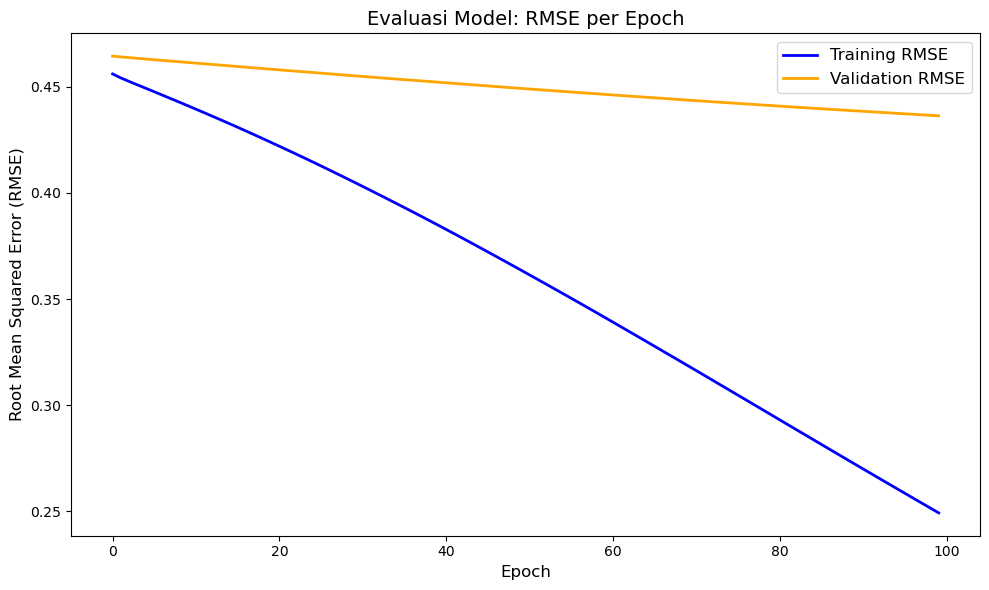

In [733]:
train_result

Catatan:
* Grafik _history_ pelatihan model menunjukkan nilai RMSE pada data training terus menurun secara konsisten, artinya bahwa model semakin baik dalam mempelajari pola pada data training.
* Nilai RMSE pada data validasi juga menurun, meski lebih lambat dibandingkan dengan data training. Ini menunjukkan bahwa model cukup baik dalam melakukan generalisasi pada data yang tidak terlihat sebelumnya.
* Terlihat tidak ada kenaikan signifikan pada nilai RMSE validasi yang menandakan bahwa overfitting belum terjadi.

## Conclusion

1. 

## References

1. Damar Upahita. 2021. *Panduan Mencukupi Kebutuhan Gizi Harian Untuk Anak Usia Sekolah (6 - 9 Tahun).* https://hellosehat.com/parenting/anak-6-sampai-9-tahun/gizi-anak/kebutuhan-asupan-gizi-anak/?amp=1. 

2. Dewi, dkk. 2021. *Pentingnya Pemenuhan Gizi Terhadap Kecerdasan Anak*. SENAPADMA:Seminar Nasional Pendidikan Dasar dan Menengah, Vol.1, pp. 16-21. Sukabumi: Universitas Nusa Putra.

1. KA, Mutirasari. 2024. *Program Makan Bergizi Gratis: Jadwal Berlaku, Sasaran hingga Aturan Pembagian.* Diakses pada 6 Desember 2024, dari https://news.detik.com/berita/d-7617806/program-makan-bergizi-gratis-jadwal-berlaku-sasaran-hingga-aturan-pembagian.

2. Kementerian Koordinator Bidang Pembangunan Manusia dan Kebudayaan Republik Indonesia. 2024. *Program Makan Bergizi Gratis untuk Tingkatkan Kualitas SDM Indonesia.* Diakses pada 6 Desember 2024, dari https://www.kemenkopmk.go.id/program-makan-bergizi-gratis-untuk-tingkatkan-kualitas-sdm-indonesia.

3. Kementerian Kesehatan Republik Indonesia. 2019. *Peraturan Menteri Kesehatan Republik Indonesia Nomor 28 Tahun 2019 Tentang Angka Kecukupan Gizi Yang Dianjurkan Untuk Masyarakat Indonesia.*